# Duat demo

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from duat.osiris import config, plot, run

If a warning on not found executables was raised, add a cell setting the path to the folder with the executables:
run.set_osiris_path(path.join("path", "to", "osiris", "folder"))

## Creating a simulation

In [4]:
# Create a config file with the defaults and change some parameters
sim=config.ConfigFile(1) # Argument -> dimension
# Parameters can be edited using the python item access notation
sim["time"]["tmax"]=30.0
sim["species_list"][1]["species"]["num_par_x"]=[200]
# Beware the python indexes starting at zero. "1" is the second particle species
sim["species_list"][0]["diag_species"].set_pars(ndump_fac=1, reports="ene")

ene_bins=np.arange(0,0.5,0.02)
sim["species_list"][1]["diag_species"].set_pars(ndump_fac=1, ndump_fac_pha=1, pha_ene_bin="x1_|charge|",
                                    ene_bins=ene_bins, n_ene_bins=len(ene_bins))

In [5]:
# Even if a section was not created, accesing it with the index notation will create it
sim["diag_emf"]["reports"]=["e1","e2","e3"]
sim["diag_emf"]["ndump_fac"]=5

In [6]:
# Check the generated code
print(sim)

node_conf
{
  node_number(1:1) = 1,
  if_periodic(1:1) = .true.,
}

grid
{
  coordinates = "cartesian",
  nx_p(1:1) = 1024,
}

time_step
{
  dt = 0.07,
  ndump = 10,
}

space
{
  xmin(1:1) = 0,
  xmax(1:1) = 102.4,
  if_move(1:1) = .false.,
}

time
{
  tmin = 0,
  tmax = 30,
}

emf_bound
{
  type(1:2, 1) = 0, 0,
  
}

diag_emf
{
  reports(1:3) = "e1", "e2", "e3",
  ndump_fac = 5,
}

particles
{
  num_species = 2,
}

!---Species configuration
!---Configuration for species 1
species
{
  num_par_max = 2048,
  rqm = -1,
  num_par_x(1:1) = 2,
  vth(1:3) = 0.1, 0.1, 0.1,
  vfl(1:3) = 0, 0, 0.6,
  den_min = 1d-05,
  num_dgam = 0,
  dgam = 0,
}

profile
{
  fx(1:6, 1) = 1, 1, 1, 1, 1, 1,
  
  x(1:6, 1) = 0, 0.9999, 1, 2, 2.001, 10000,
  
}

spe_bound
{
  type(1:2, 1) = 0, 0,
  
}

diag_species
{
  ndump_fac = 1,
  reports = "ene",
}


!---Configuration for species 2
species
{
  num_par_max = 2048,
  rqm = -1,
  num_par_x(1:1) = 200,
  vth(1:3) = 0.1, 0.1, 0.1,
  vfl(1:3) = 0, 0, 0.6,
  den_min

## Running a simulation

In [7]:
# A directory for the runs
run_dir = os.path.join(os.path.expanduser("~"), "osiris-runs")
print(run_dir)

/home/guillehg/osiris-runs


In [8]:
# Sequentially run simulations varying a parameter. Also check for errors, but note they are not always detected
run_list=[]
for i in [2, 20, "IAMERROR"]:
    sim["species_list"][1]["species"]["num_par_x"]=[i]
    r = run.run_config(sim, run_dir+"/parx"+str(i), prefix="", blocking=False, clean_dir=True)
    print("Expected time to end: %.2f s"% r.estimated_time())
    run_list.append(r)
    

Expected time to end: 0.10 s
Expected time to end: 3.45 s


Error detected while launching /home/guillehg/osiris-runs/parxIAMERROR.
Check out.txt there for more information or re-run in console.


Expected time to end: 0.00 s


In [9]:
# Other methods are available in the Run object. See the documentation for more information.
print("Size in disk of a run: %.2f MiB" % (run_list[1].get_size()/1024/1024))

Size in disk of a run: 3.38 MiB


## Plotting the results

In [10]:
# Choose one the results to demonstrate plots 
ex_run = run_dir + "/parx2"

In [11]:
# Automatic generation of 1d plots of generated data
with plt.style.context(['ggplot']): # A context can be used to change the plot style
    plot.auto_process(ex_run, file_format="mp4", verbose=True, kwargs_1d=dict(dpi=300))

Generating file(s) for species 2 x_1 (|charge|)
- Dimensions: ([64], 26, 43)
- Generating: /home/guillehg/osiris-runs/parx2/plot/species 2 x_1 (|charge|)_0.mp4
- Generating: /home/guillehg/osiris-runs/parx2/plot/species 2 x_1 (|charge|)_13.mp4
- Generating: /home/guillehg/osiris-runs/parx2/plot/species 2 x_1 (|charge|)_25.mp4
Generating file(s) for E_2
- Dimensions: ([1024], 1, 9)
- Generating: /home/guillehg/osiris-runs/parx2/plot/E_2.mp4
Generating file(s) for E_1
- Dimensions: ([1024], 1, 9)
- Generating: /home/guillehg/osiris-runs/parx2/plot/E_1.mp4
Generating file(s) for E_3
- Dimensions: ([1024], 1, 9)
- Generating: /home/guillehg/osiris-runs/parx2/plot/E_3.mp4
Generating file(s) for Kinetic Energy
- Dimensions: ([1024], 1, 43)
- Generating: /home/guillehg/osiris-runs/parx2/plot/Kinetic Energy.mp4


In [12]:
# For customized generation of plots, use the Diagnostic class
d = plot.Diagnostic(os.path.join(ex_run, "MS/PHA/x1_|charge|_bin_ene/species_2"))
print(d.shape)
# This displays the length in each axis (as a list), the number of datasets and the number of timestamps

([64], 26, 43)


In [13]:
# Select position 5 in the first axis (which is x1).
# The remaining degree of freedom is the dataset, here energy binning
d.time_1d_animation(axes_selector=(5,), output_path=os.path.join(ex_run,"plot","test.mp4"))

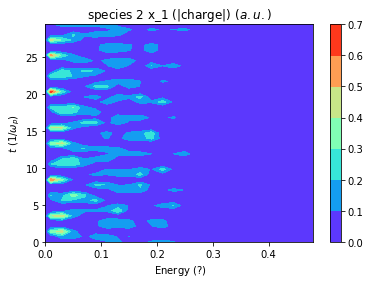

In [14]:
# Do the same as a color map
d.time_1d_colormap(axes_selector=(5,), cmap="rainbow")

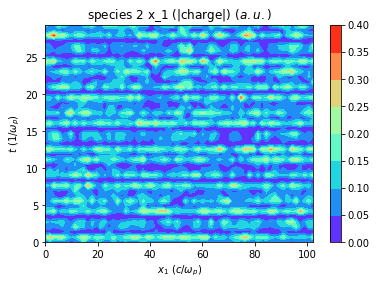

In [15]:
# Now fix a dataset (energy) instead
d.time_1d_colormap(dataset_selector=5, cmap="rainbow")

In [16]:
# You can use the get_diagnostic_list function to automatically search for diagnostics:
plot.get_diagnostic_list(ex_run)

[Diagnostic<species 2 x_1 (|charge|) ([64], 26, 43)>,
 Diagnostic<E_2 ([1024], 1, 9)>,
 Diagnostic<E_1 ([1024], 1, 9)>,
 Diagnostic<E_3 ([1024], 1, 9)>,
 Diagnostic<Kinetic Energy ([1024], 1, 43)>]

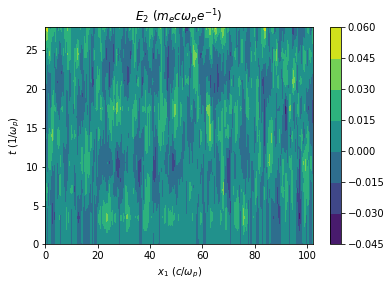

In [17]:
plot.get_diagnostic_list(ex_run)[1].time_1d_colormap()

In [18]:
# For manual manipulation use the get_generator method
gen = plot.get_diagnostic_list(ex_run)[1].get_generator()
# This returns a generator that provides data when iterated

In [19]:
for snapshot in gen:
    print(snapshot)

[ 0.  0.  0. ...,  0.  0.  0.]
[-0.00322306 -0.00522975 -0.00561492 ..., -0.00099357 -0.00189998
 -0.00072448]
[-0.01148757 -0.00424596  0.00866065 ..., -0.00131209 -0.00704931
 -0.0147919 ]
[-0.00945068  0.00464916 -0.00139107 ..., -0.01322388 -0.01300046
 -0.0036142 ]
[-0.01387668 -0.01165098 -0.01918631 ..., -0.00947732 -0.01107293
 -0.01316959]
[-0.02509208 -0.02770903 -0.03530693 ..., -0.02137129 -0.02424224
 -0.03385735]
[-0.00306129 -0.01257404 -0.00315387 ..., -0.01539171 -0.01293476
 -0.01297446]
[ 0.012858    0.00960065  0.00320919 ...,  0.00521354  0.0063723
  0.00569589]
[ 0.03408493  0.02542153  0.03666947 ...,  0.02179871  0.02756875
  0.01687863]
